In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


# Checking Null value

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [7]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Droping a column

In [8]:
df.drop(columns=['id'],inplace=True)

In [9]:
df.reset_index(drop=True,inplace=True)

# checking dtypes

In [10]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# Checking Duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

# EDA
Univariate


In [12]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [13]:
Numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
Categorical_col=df.select_dtypes(include=['object']).columns.tolist()


Analysing Numerical column

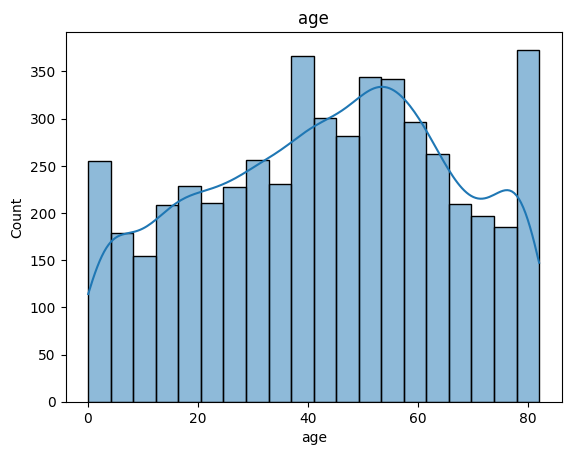

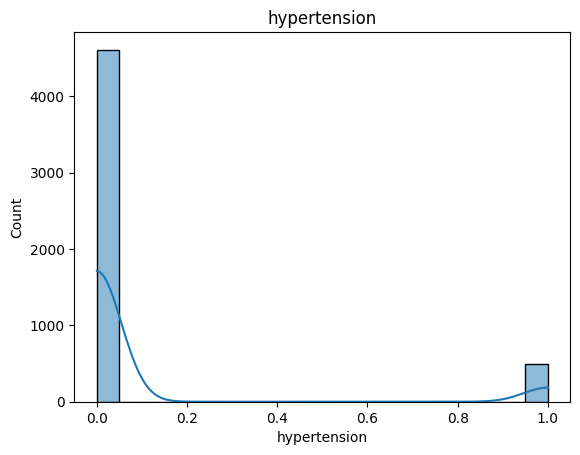

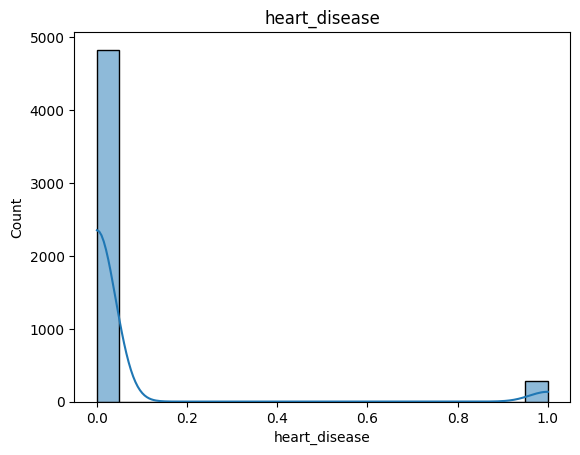

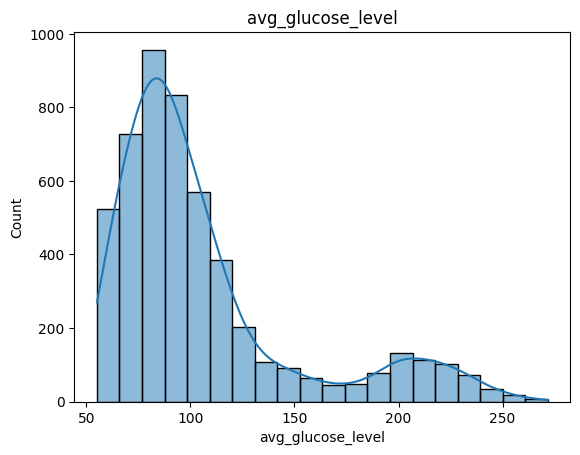

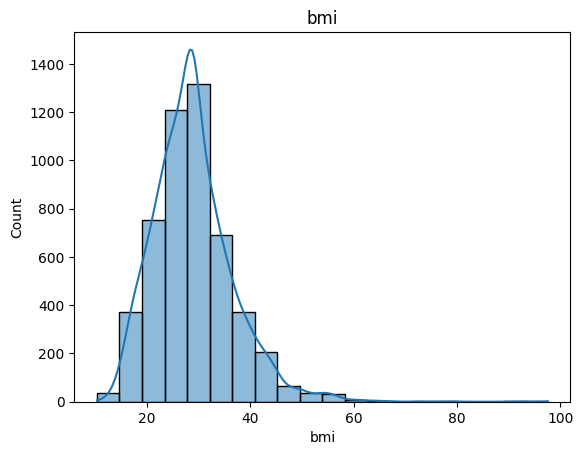

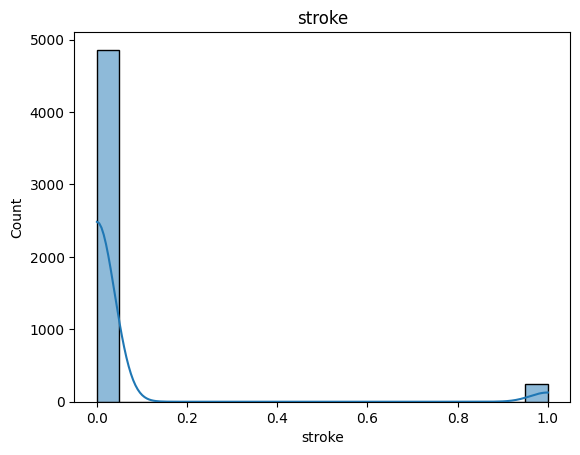

In [14]:
for i in Numerical_col:
    sns.histplot(x=df[i],bins=20,kde=True)
    plt.title(i)
    plt.show()



Analysing Categorical_col

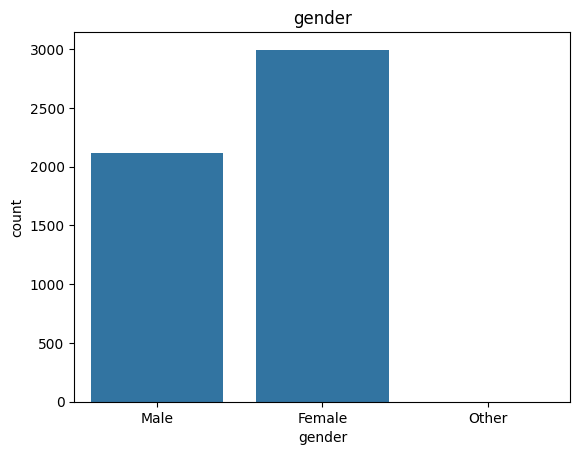

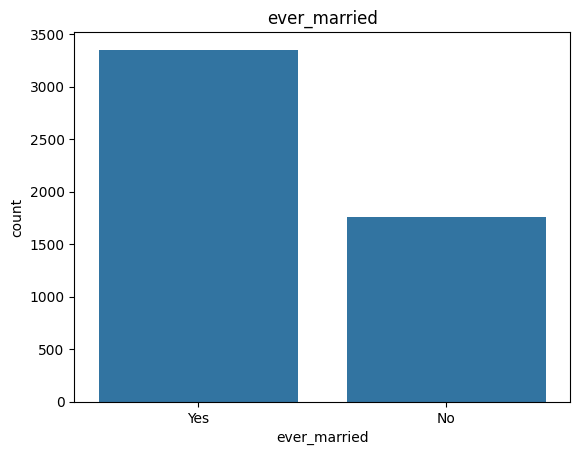

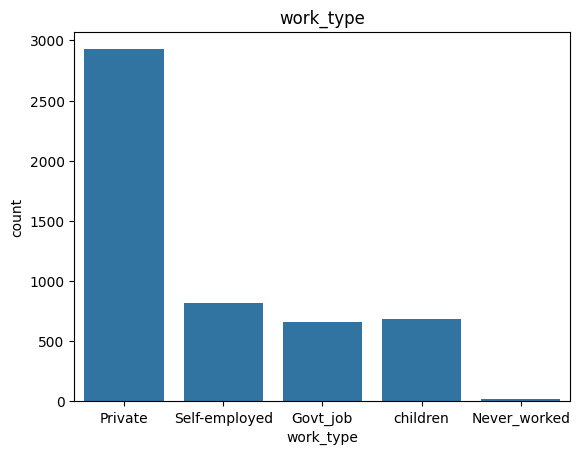

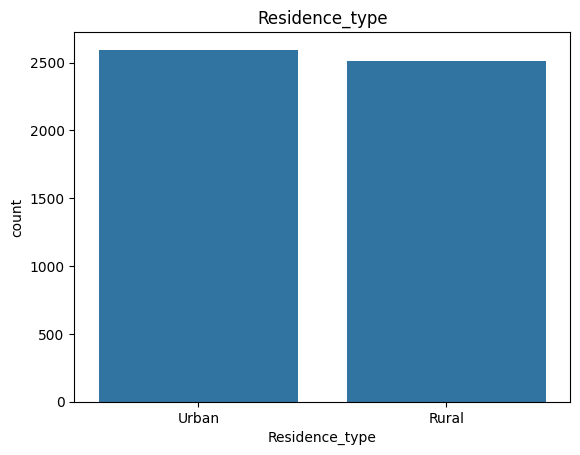

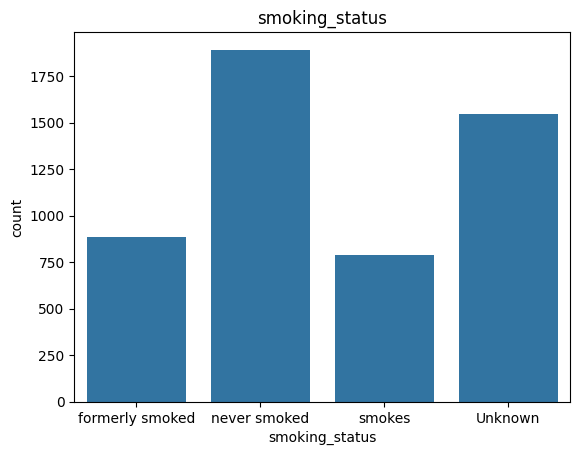

In [15]:
for i in Categorical_col:
    sns.countplot(x=df[i])
    plt.title(i)
    plt.show()

Bivariate

In [16]:
#Numerical vs Numerical 

C:\Users\akhil\AppData\Local\Temp\ipykernel_22704\3513427284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['stroke'], y=df[i], inner="quartile", palette="muted")


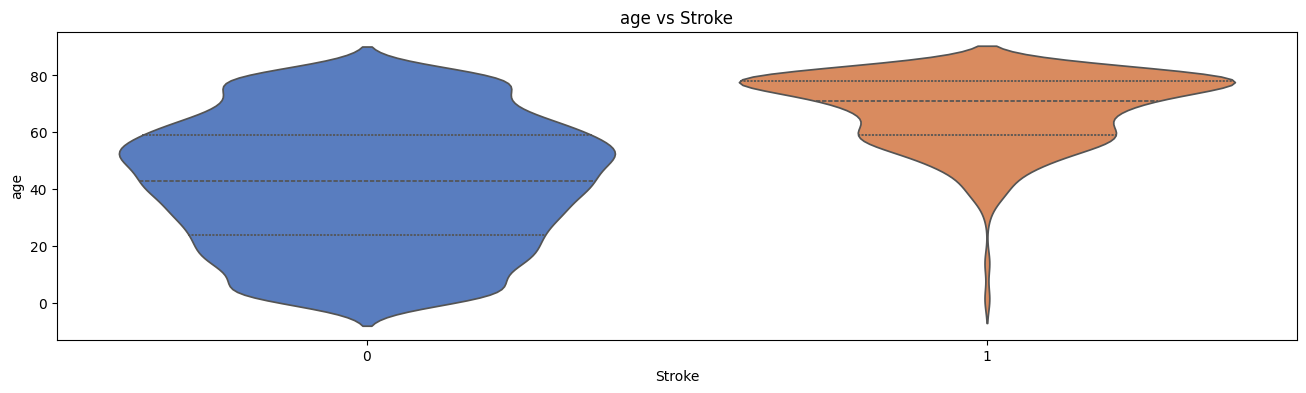

C:\Users\akhil\AppData\Local\Temp\ipykernel_22704\3513427284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['stroke'], y=df[i], inner="quartile", palette="muted")


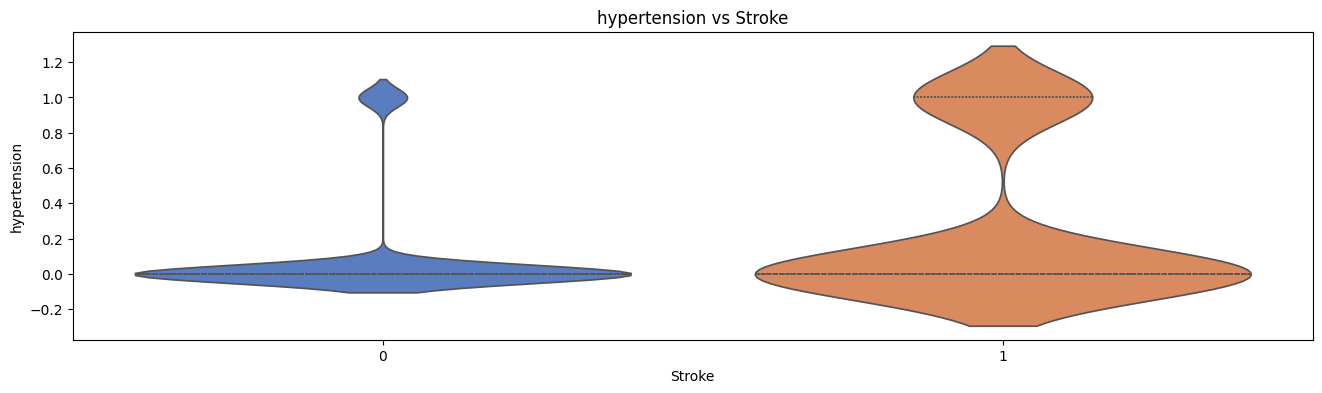

C:\Users\akhil\AppData\Local\Temp\ipykernel_22704\3513427284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['stroke'], y=df[i], inner="quartile", palette="muted")


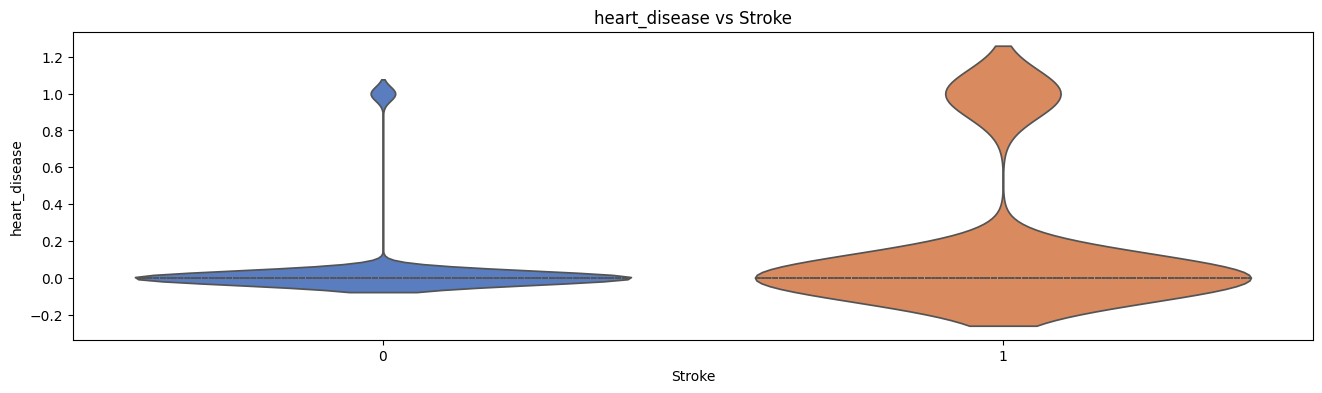

C:\Users\akhil\AppData\Local\Temp\ipykernel_22704\3513427284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['stroke'], y=df[i], inner="quartile", palette="muted")


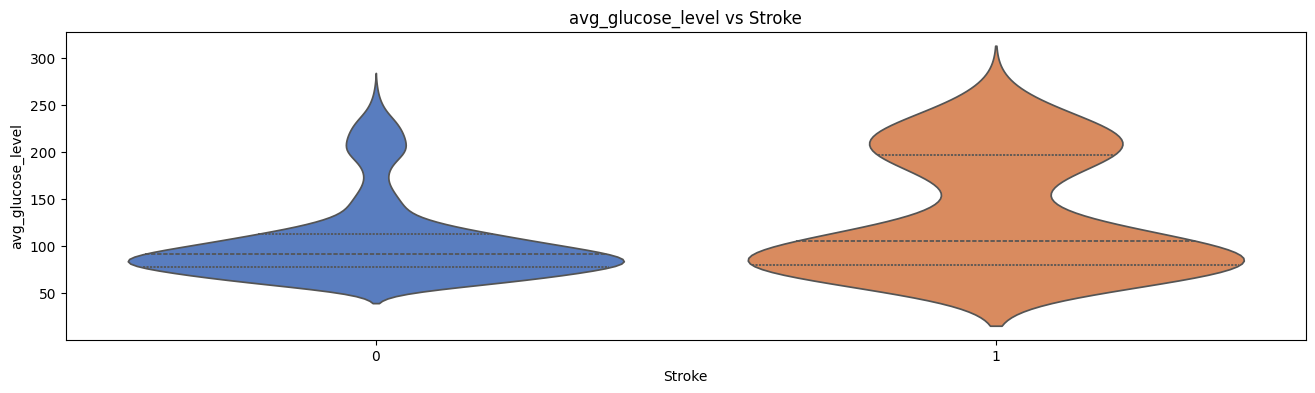

C:\Users\akhil\AppData\Local\Temp\ipykernel_22704\3513427284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['stroke'], y=df[i], inner="quartile", palette="muted")


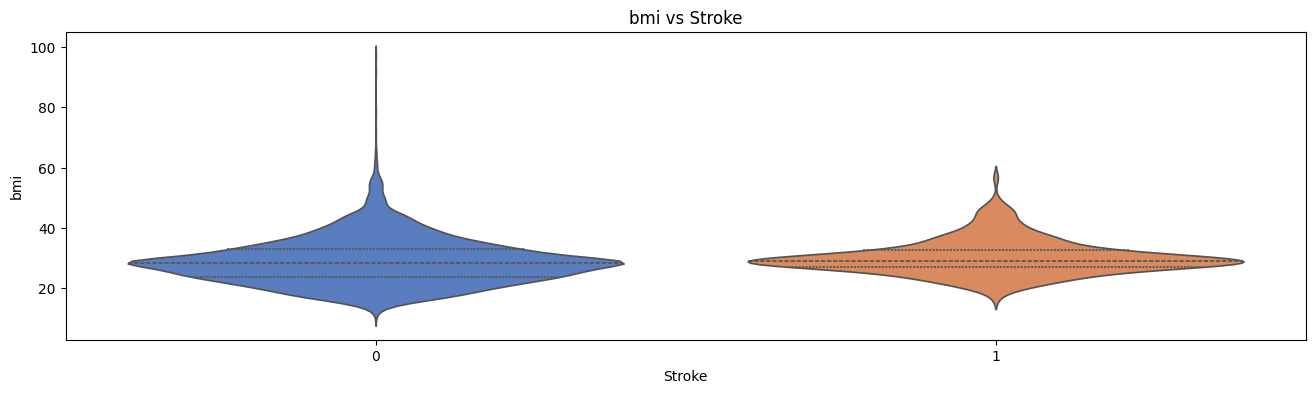

In [17]:
for i in Numerical_col:
    if i != 'stroke':
        plt.figure(figsize=(16, 4))  # Set figure size
        
        # Correcting x and y: Stroke should be categorical (x-axis)
        sns.violinplot(x=df['stroke'], y=df[i], inner="quartile", palette="muted")
        
        plt.title(f"{i} vs Stroke")  # Dynamic title
        plt.xlabel("Stroke")  # X-axis should be categorical (0 or 1)
        plt.ylabel(i)  # Y-axis is numerical
        
        plt.show()

In [18]:
#categorical vs categorical 

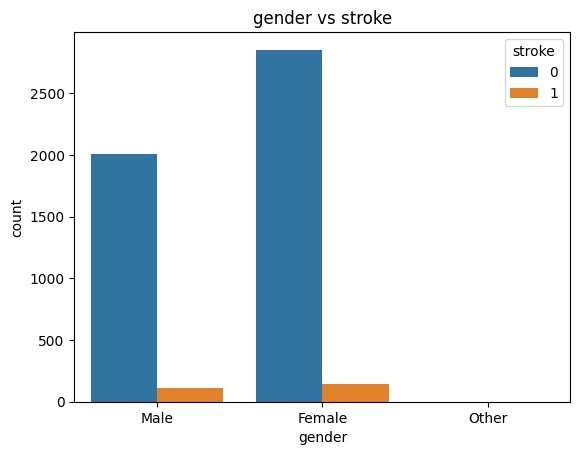

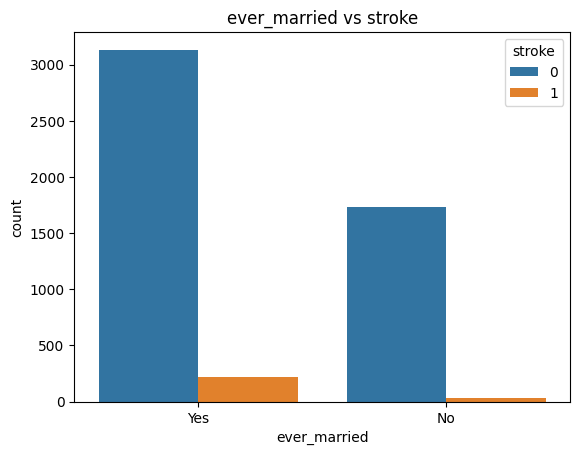

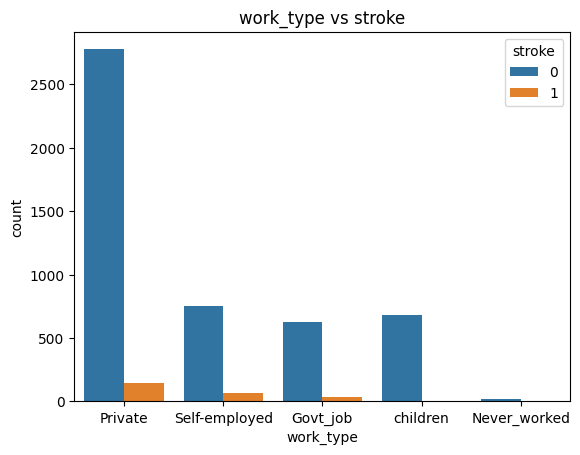

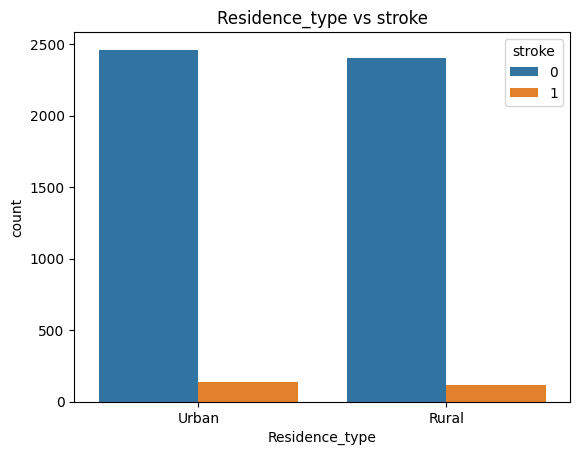

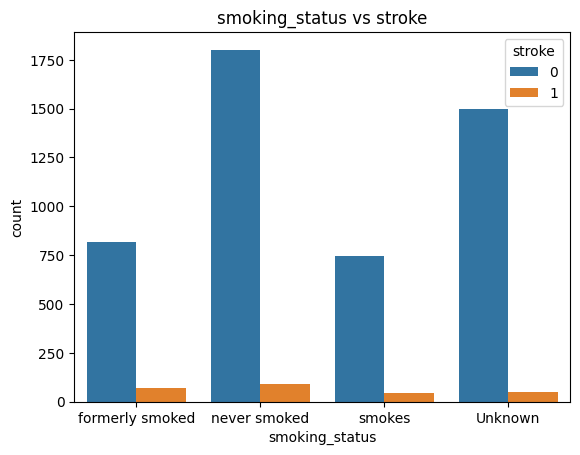

In [19]:
for i in Categorical_col:
    sns.countplot(x=df[i],hue=df['stroke'],data=df)
    plt.title(f"{i} vs stroke")
    plt.show()


In [20]:
#Numerical vs categorical 

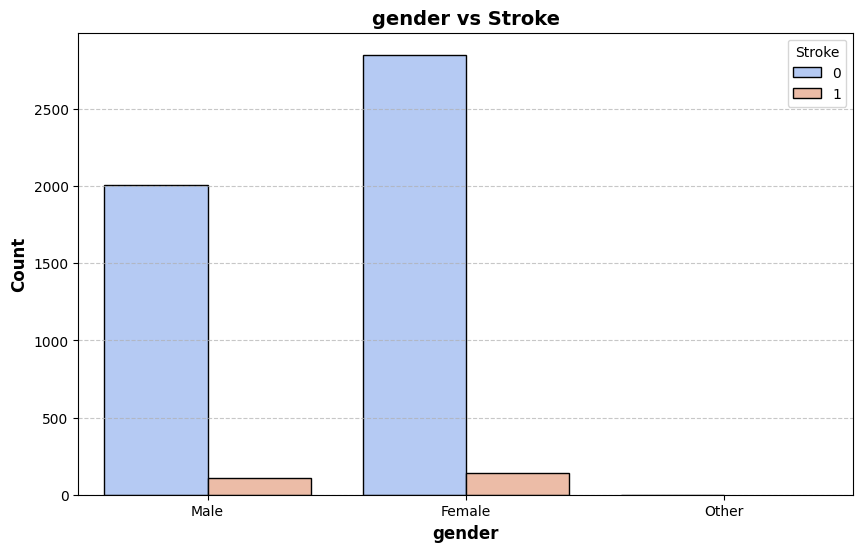

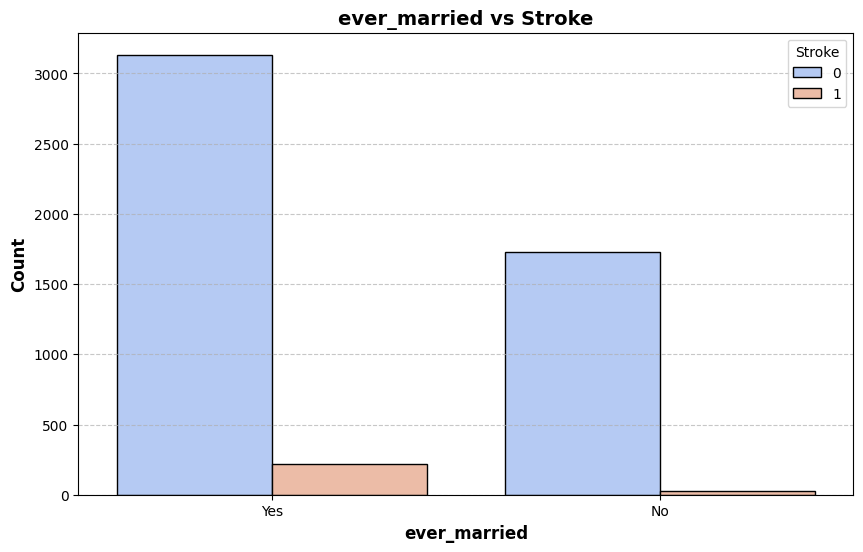

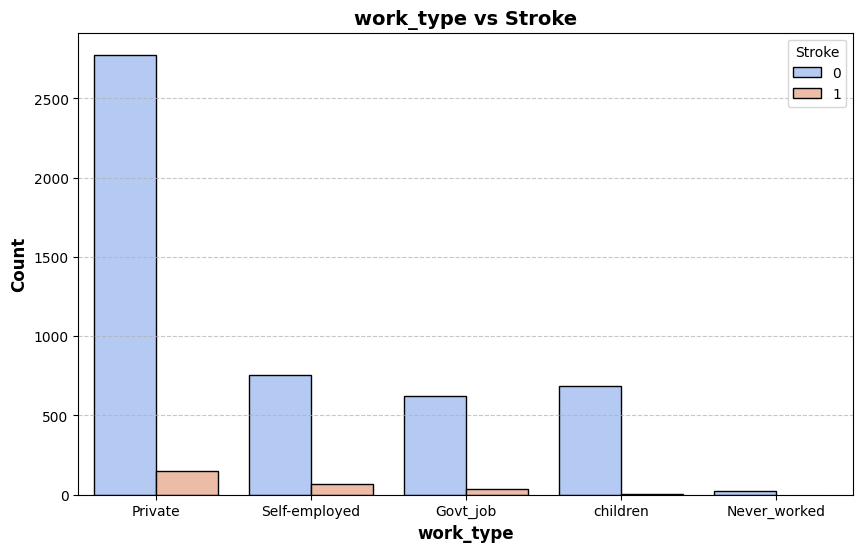

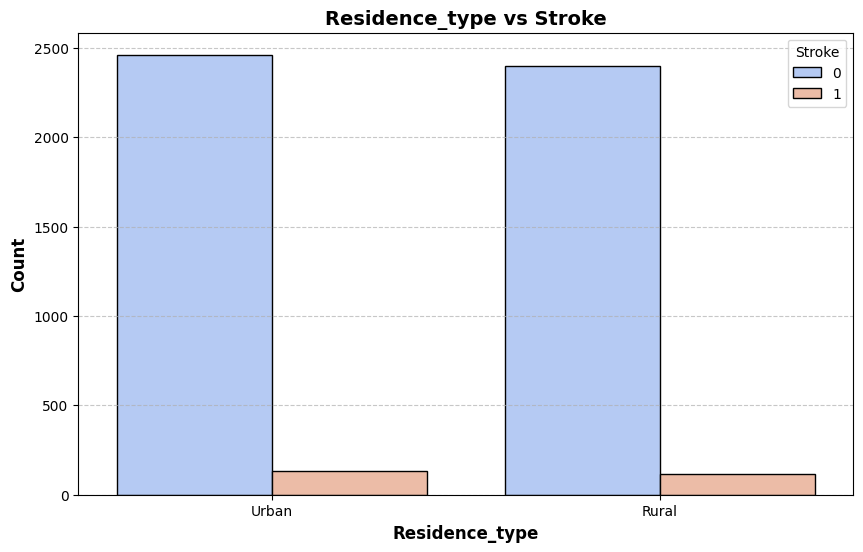

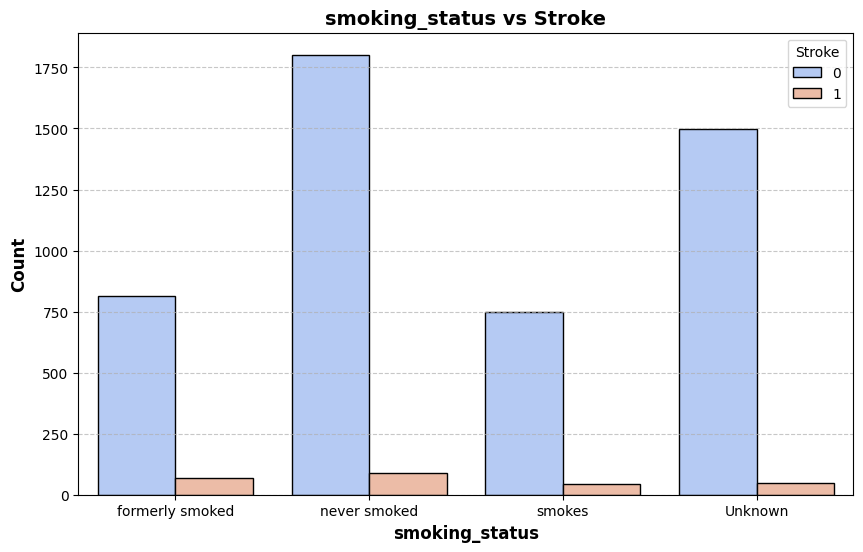

In [21]:
for i in Categorical_col:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[i], hue=df['stroke'], palette='coolwarm', edgecolor='black')
    
    plt.xlabel(i, fontsize=12, fontweight='bold')
    plt.ylabel("Count", fontsize=12, fontweight='bold')
    plt.title(f"{i} vs Stroke", fontsize=14, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light grid for better readability
    plt.legend(title="Stroke", loc="upper right")

    plt.show()

Multivariate


In [22]:
# #multiple categorical column

<Figure size 800x500 with 0 Axes>

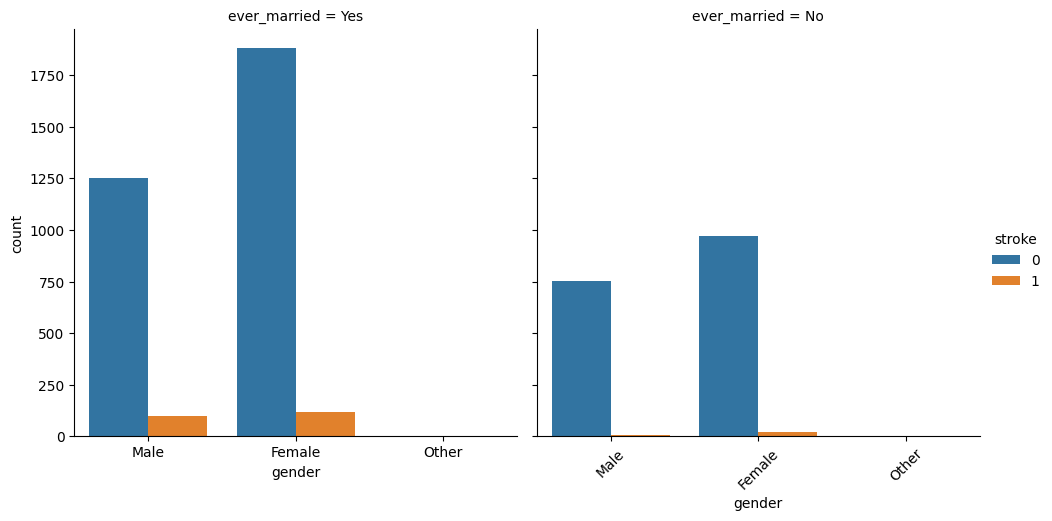

<Figure size 800x500 with 0 Axes>

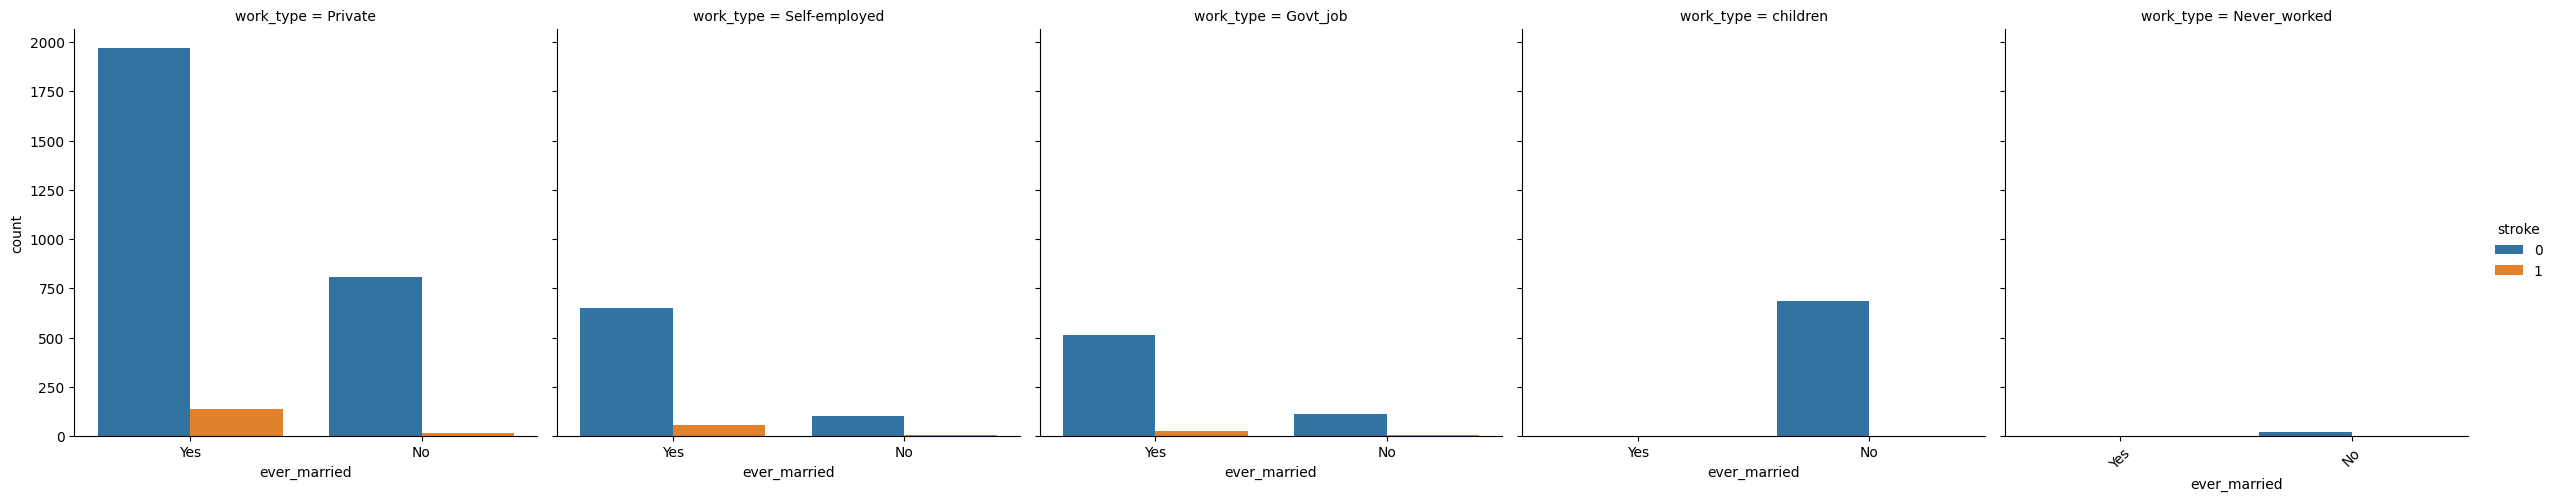

<Figure size 800x500 with 0 Axes>

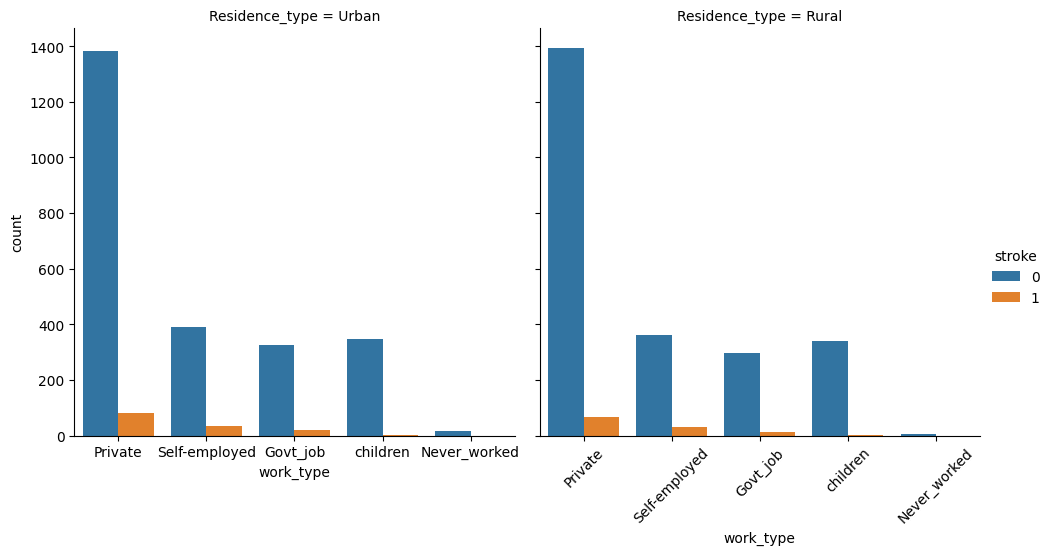

<Figure size 800x500 with 0 Axes>

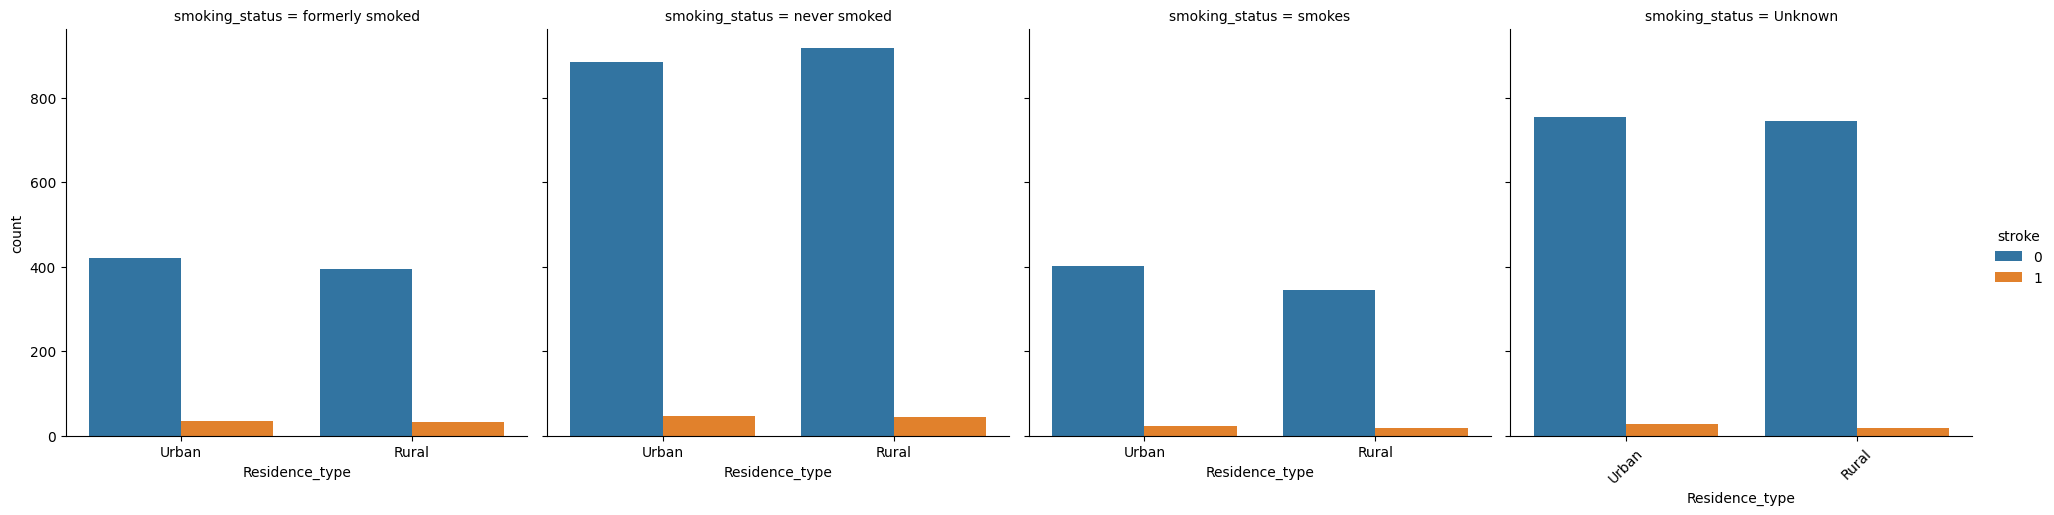

In [23]:

for i in range(len(Categorical_col) - 1):
    if Categorical_col[i] != "Diagnosis" and Categorical_col[i+1] != "Diagnosis":
        plt.figure(figsize=(8, 5))  

        sns.catplot(x=Categorical_col[i], hue="stroke", col=Categorical_col[i+1], kind='count', data=df)

        plt.xticks(rotation=45)  
        plt.show()

In [24]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Label encoding 

In [25]:
for i  in Categorical_col:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
    print(le.classes_)


['Female' 'Male' 'Other']
['No' 'Yes']
['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
['Rural' 'Urban']
['Unknown' 'formerly smoked' 'never smoked' 'smokes']


In [26]:
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


Checking outliers

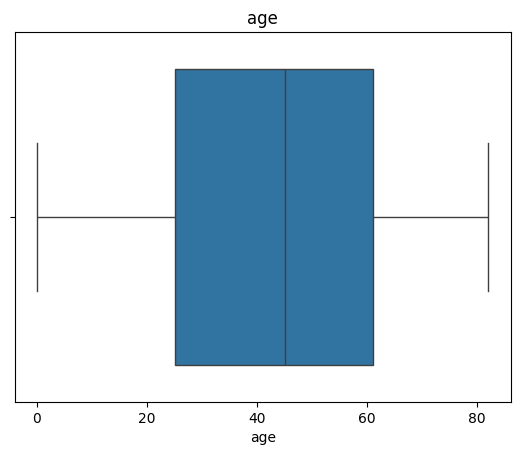

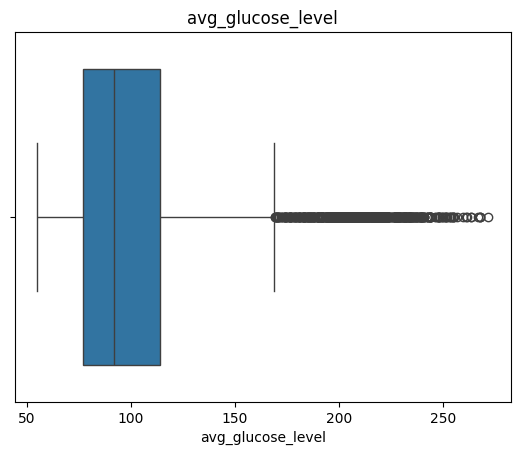

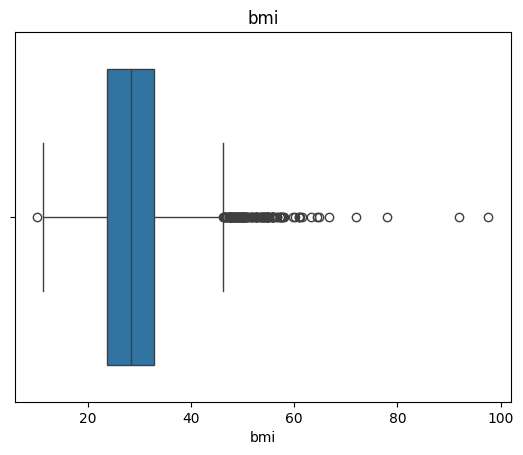

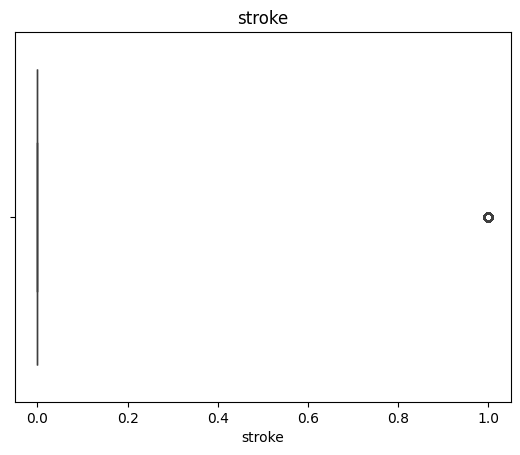

In [27]:
for i in Numerical_col:
    if i not in ["hypertension", "heart_disease"]: 
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

In [28]:
for i in Numerical_col:
    if i not in ["hypertension", "heart_disease"]: 
        
    
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier thresholds
        Minimum = Q1 - 1.5 * IQR
        Maximum = Q3 + 1.5 * IQR

        # Apply outlier capping directly on 'normalized-losses'
        df[i] = np.where(df[i] > Maximum, Maximum, 
        np.where(df[i] < Minimum, Minimum, df[i]))

# Print new shape after outlier capping
print("New shape after outlier capping:", df.shape)

New shape after outlier capping: (5110, 11)


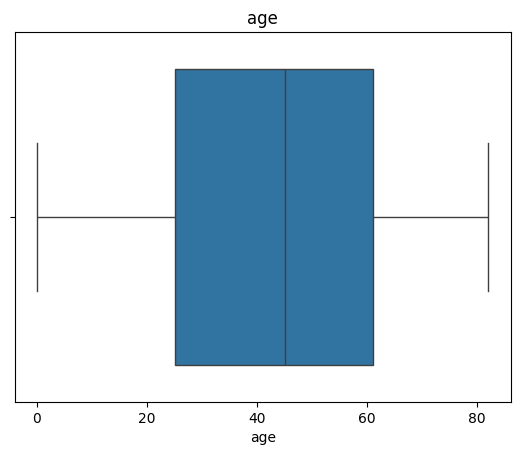

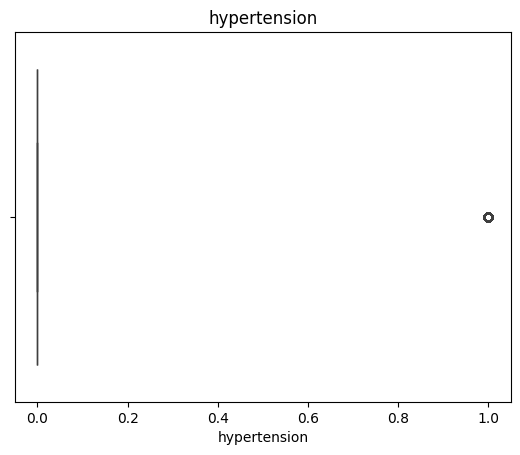

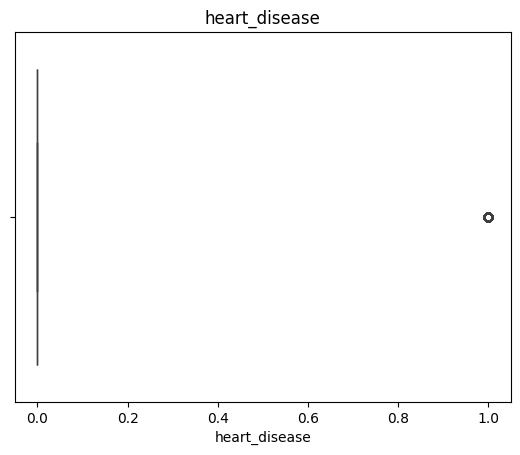

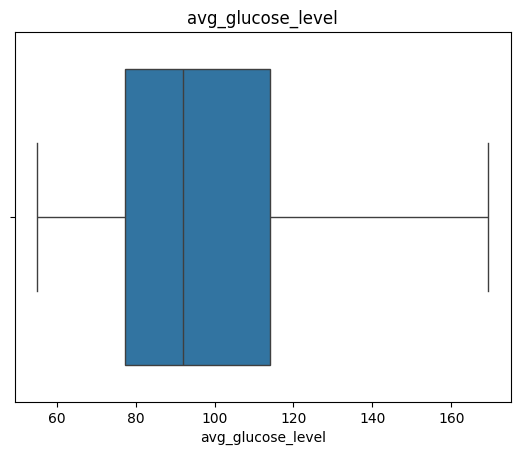

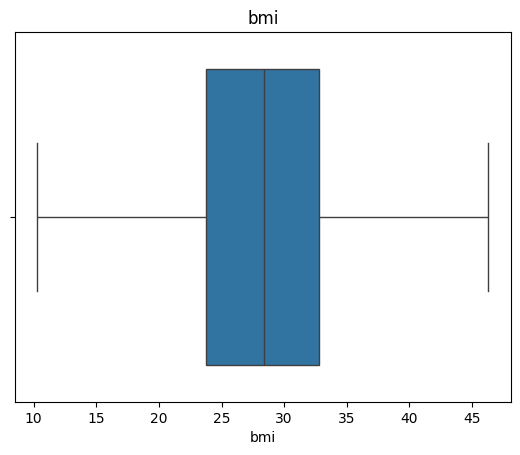

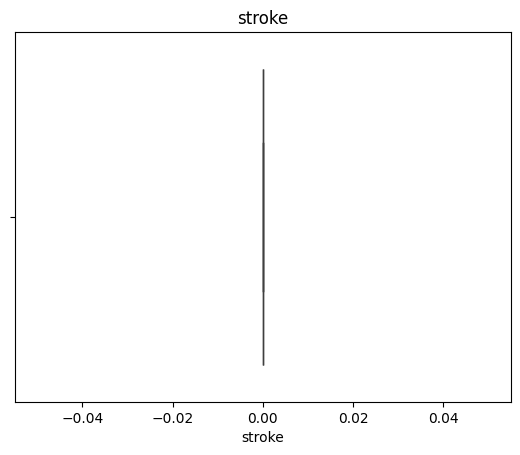

In [29]:
for i in Numerical_col:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()


# Plotting correlation heatmap

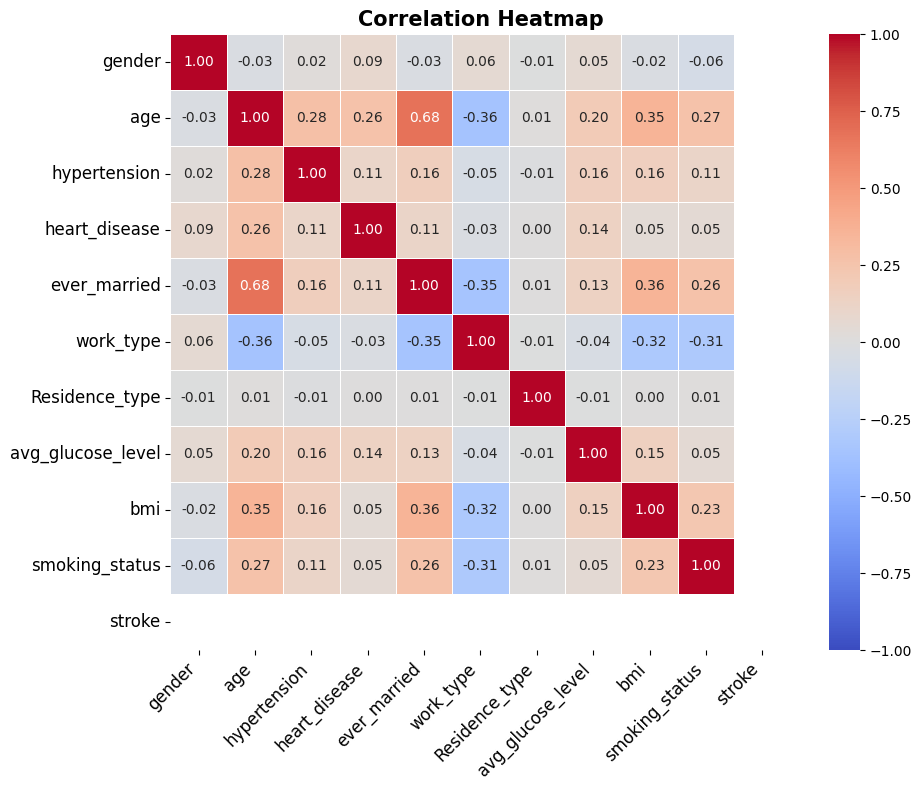

In [30]:
plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, 
            annot_kws={"size": 10}, vmin=-1, vmax=1)  

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12)  # Increase font size for y-axis labels
plt.title("Correlation Heatmap", fontsize=15, fontweight='bold')  # Improve title visibility
plt.show()